# Использование UMAP для уменьшения размерности

[Visualizing Dimensionality Reduction](https://towardsdatascience.com/visualizing-dimensionality-reduction-18172a92e5ed)

Импорт необходимых пакетов.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
mpl.rcParams["figure.figsize"] = (12, 10)

Загрузска датасета с информацией о пингвинах.

In [3]:
penguins = pd.read_csv(
    "https://github.com/allisonhorst/palmerpenguins/raw/"
    "5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv"
)
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Удалить строки с значениями null из набора данных.

In [4]:
penguins = penguins.dropna()

penguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

После этого мы создадим объект-редуктор с помощью UMAP, который будет использоваться для уменьшения размерности и дальнейшей визуализации.

In [5]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

reducer = umap.UMAP()
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
embedding = reducer.fit_transform(scaled_penguin_data)

Построение графика уменьшения размерности. На этом этапе мы построим график снижения размерности.

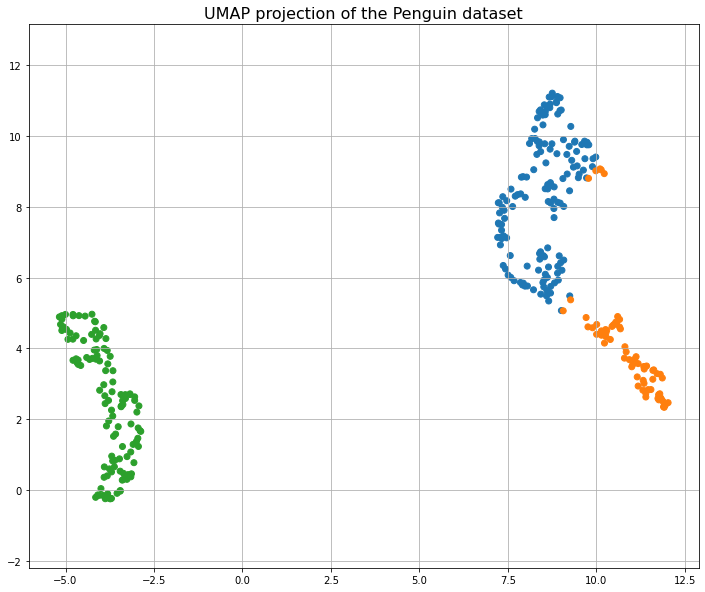

In [6]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[
        sns.color_palette()[x]
        for x in penguins.species_short.map({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
    ],
)
plt.gca().set_aspect("equal", "datalim")
plt.title("UMAP projection of the Penguin dataset", fontsize=16)

plt.grid(True)
plt.show();